# Demo: ETL with Cocoon for Common Data Model

We illstrate how to use Cocoon for [Common Data Model](http://ohdsi.github.io/CommonDataModel/cdm54.html).

There are 3 steps:
1. Documentation
2. Cleaning
3. Transformation

We will use synthetic patient data provided from Synthea.



## Prerequisite

1. Installation
2. Configuration OpenAI API Key
3. Download files

To obtain the OpenAI API key, refer to the Cocoon's GitHub page at https://github.com/Cocoon-Data-Transformation/cocoon/tree/main#openai-api-key.


In [1]:
! pip install cocoon_data==0.1.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: cocoon_data
    Found existing installation: cocoon-data 0.1.11
    Uninstalling cocoon-data-0.1.11:
      Successfully uninstalled cocoon-data-0.1.11


In [2]:
from cocoon_data import *

In [ ]:
# set up your api key
openai.api_key = ""

# test if it works
response = openai.ChatCompletion.create(
    model="gpt-4-1106-preview",
    messages=[
      {"role": "user", "content": "hello!"},
  ]
)

print(response['choices'][0]['message']["content"])

Hello! How can I assist you today?


In [4]:
import requests

# Download the required file for this demo
# Dictionary of file names and their URLs
files = {
    "patients.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients.csv",
    "patients_cocoon_data.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_cocoon_data.json",
    "patients_transformer.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_transformer.json"
}

# Loop through the files dictionary
for file_name, url in files.items():
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open file in binary write mode
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}.")


patients.csv downloaded successfully.
patients_cocoon_data.json downloaded successfully.
patients_transformer.json downloaded successfully.


## Documentation

Begin by downloading the required files. The documentation process is interactive and should take only a few minutes.


In [5]:
# pass the dataframe and the table name to the cocoon documenter
cocoon_documenter = read_data("./patients.csv")

Congratulation! The document is complete. 🎉

What's next?
1. Use Cleaner 🧹 to clean the data.
2. Use Standardizer 📏 to standardize the data.
3. Use Transformer 🔌 to transform the data.      
...

And more to come! 🚀
🤓 Do you want to save the file?


Text(value='patients_cocoon_data.json', description='File Name:')

Button(description='Save File', style=ButtonStyle())


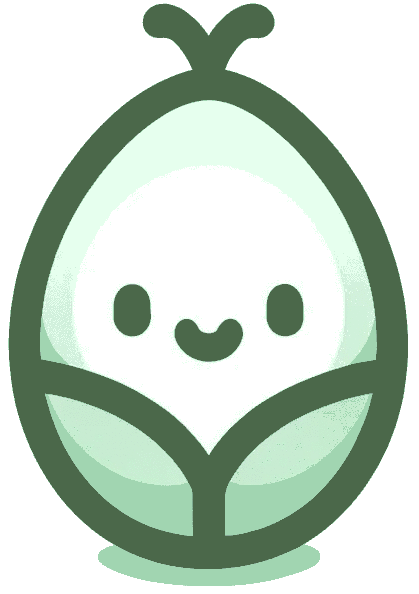

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,...,CITY,STATE,COUNTY,LOCATION_FIPS,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel236,Bailey598,NaN,...,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne169,Marks830,NaN,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter736,Keebler762,NaN,...,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel574,Ernser583,NaN,...,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey714,Heathcote539,NaN,...,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420


/usr/local/lib/python3.10/dist-packages/cocoon_data/__init__.py:1611: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [6]:
# display the document
cocoon_documenter

In [7]:
# save the document as html
cocoon_documenter.save_as_html('./patients.html')

/usr/local/lib/python3.10/dist-packages/cocoon_data/__init__.py:1611: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Cleaning

As you go through the documentation, various issues will be identified. Now, let's engage in an interactive data cleaning process to resolve these issues and establish a data pipeline.


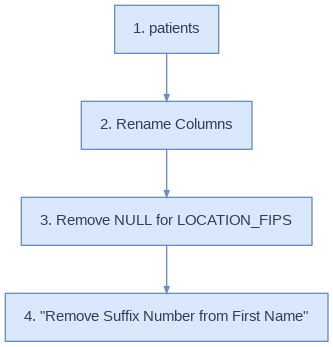

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for LOCATION_FIPS', '4. "Remove Suffix N…

Done


In [8]:
# clean the data
cocoon_cleaner = DataCleaning(cocoon_documenter)
cocoon_cleaner

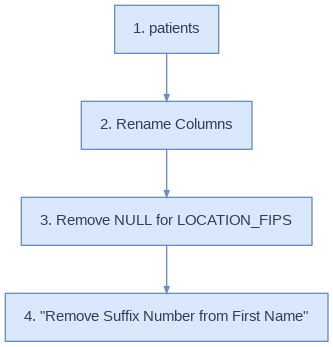

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for LOCATION_FIPS', '4. "Remove Suffix N…

In [9]:
# inspect the cleaning pipeline
cocoon_cleaner.pipeline

In [10]:
# run the cleaning codes and return the cleaned dataframe
cleaned_df = cocoon_cleaner.run_codes()
cleaned_df

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,...,CITY,STATE,COUNTY,LOCATION_FIPS,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel,Bailey598,NaN,...,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne,Marks830,NaN,...,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter,Keebler762,NaN,...,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel,Ernser583,NaN,...,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey,Heathcote539,NaN,...,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420
5,7ec76836-c039-d9bf-8bb9-fe488c66d452,2003-01-13,NaN,999-42-9847,S99998925,NaN,Ms.,Adelia,Collier206,NaN,...,Boston,Massachusetts,Suffolk County,25025.0,2134,42.315506,-71.051696,4050.00,158604.59,1361
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998-12-14,NaN,999-49-9846,S99945605,X69843358X,Mr.,Hayden,Casper496,NaN,...,Belmont,Massachusetts,Middlesex County,25017.0,2472,42.361539,-71.209136,40347.11,180076.32,51861
7,734e5f3c-e660-6cbe-7c26-c5264cbde68e,2005-03-03,NaN,999-71-8314,S99991875,NaN,NaN,Herb,Willms744,NaN,...,Brockton,Massachusetts,Plymouth County,25023.0,2302,42.111654,-71.025907,390568.25,0.00,35002
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983-02-18,NaN,999-95-3792,S99957390,X63804957X,Mr.,Stewart,Schimmel440,NaN,...,Sharon,Massachusetts,Norfolk County,25021.0,2067,42.101473,-71.205475,7321.10,176776.70,10335
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998-10-30,NaN,999-44-2795,S99942670,X49037240X,Ms.,Jenae,Becker968,NaN,...,Lynn,Massachusetts,Essex County,25009.0,1901,42.498504,-71.035824,34690.56,626729.36,56421


In [11]:
# print the cleaning codes
cocoon_cleaner.print_codes()

from cocoon_data import *

df_0 = pd.read_csv('./patients.csv', sep=',', encoding='utf-8') 

# Rename columns in the DataFrame based on column indices to avoid circular issues
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'LOCATION_FIPS',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    # Create a list of the current column names
    new_column_names = list(df.columns)

    # Find the indices of the columns to be renamed and update their names
    for old_name, new_name in rename_map.items():
        if old_name in df.columns:
            index = df.columns.get_loc(old_name)
            new_column_names[index] = new_name
        else:
            raise ValueError(f'Column LON not found in DataFrame')

    

## Transformation

Excellent, the data is now clean. The next step is to transform it into the common data model. (http://ohdsi.github.io/CommonDataModel/cdm54.html)

In [12]:
# pass the documenter to the cocoon transformer
cocoon_transformer = CDMTransformation(cocoon_cleaner)

# optionally, you can load past transformation
cocoon_transformer.read_document_from_disk('./patients_transformer.json')

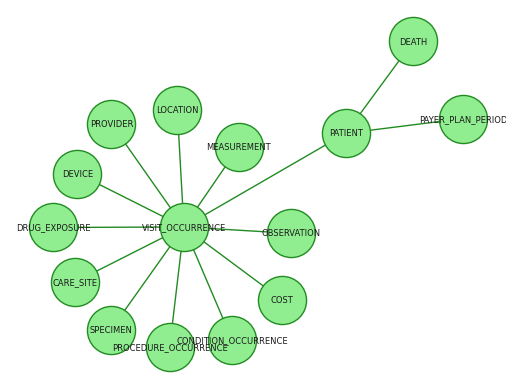

In [13]:
# print out the target tables
cocoon_transformer.display_database()

💻 Writing the codes...


IntProgress(value=1, max=7)

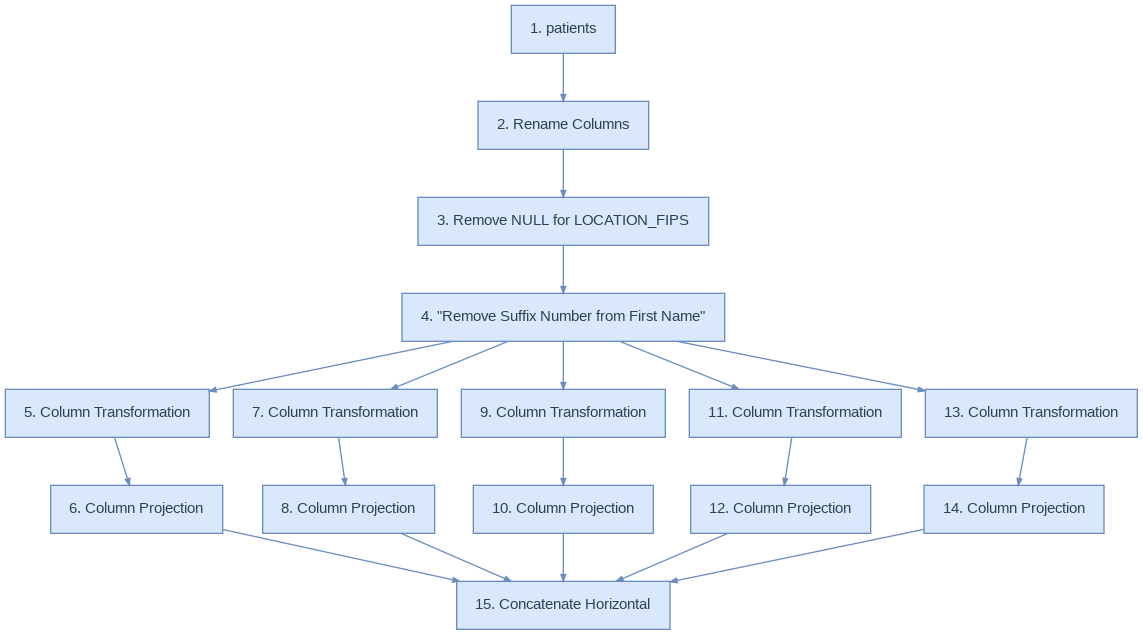

Dropdown(options=('1. patients', '2. Rename Columns', '3. Remove NULL for LOCATION_FIPS', '4. "Remove Suffix N…

In [14]:
cocoon_transformer.start()

In [15]:
# remember to save the transformation document to disk, so you can load it later
cocoon_transformer.write_document_to_disk('./patients_transformer.json')

In [16]:
# display the transformation codes
cocoon_transformer.pipeline.print_codes()

from cocoon_data import *

df_0 = pd.read_csv('./patients.csv', sep=',', encoding='utf-8') 

# Rename columns in the DataFrame based on column indices to avoid circular issues
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'LOCATION_FIPS',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    # Create a list of the current column names
    new_column_names = list(df.columns)

    # Find the indices of the columns to be renamed and update their names
    for old_name, new_name in rename_map.items():
        if old_name in df.columns:
            index = df.columns.get_loc(old_name)
            new_column_names[index] = new_name
        else:
            raise ValueError(f'Column LON not found in DataFrame')

    

In [17]:
# run the transformation codes and return the transformed dataframe
target_df = cocoon_transformer.run_codes()
target_df

,person_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,gender_concept_id,gender_source_value,race_concept_id,race_source_value,ethnicity_concept_id,ethnicity_source_value
0,eb247227-e839-88d3-447d-b5972468f33b,2021,9,23,2021-09-23,8507,M,8527,white,38003563,nonhispanic
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944,5,31,1944-05-31,8532,F,8527,white,38003563,nonhispanic
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009,2,8,2009-02-08,8507,M,8527,white,38003563,nonhispanic
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979,6,26,1979-06-26,8507,M,8515,asian,38003563,nonhispanic
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973,5,31,1973-05-31,8532,F,8527,white,38003563,nonhispanic
5,7ec76836-c039-d9bf-8bb9-fe488c66d452,2003,1,13,2003-01-13,8532,F,8527,white,38003563,nonhispanic
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998,12,14,1998-12-14,8507,M,8527,white,38003563,nonhispanic
7,734e5f3c-e660-6cbe-7c26-c5264cbde68e,2005,3,3,2005-03-03,8507,M,8527,white,38003564,hispanic
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983,2,18,1983-02-18,8507,M,8527,white,38003563,nonhispanic
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998,10,30,1998-10-30,8532,F,8527,white,38003563,nonhispanic
